                     Accuracy Precision    Recall  F1-score
Logistic Regression  0.966667  0.969697  0.966667  0.966583
Decision Tree        0.933333  0.933333  0.933333  0.933333
Random Forest             0.9  0.902357       0.9  0.899749


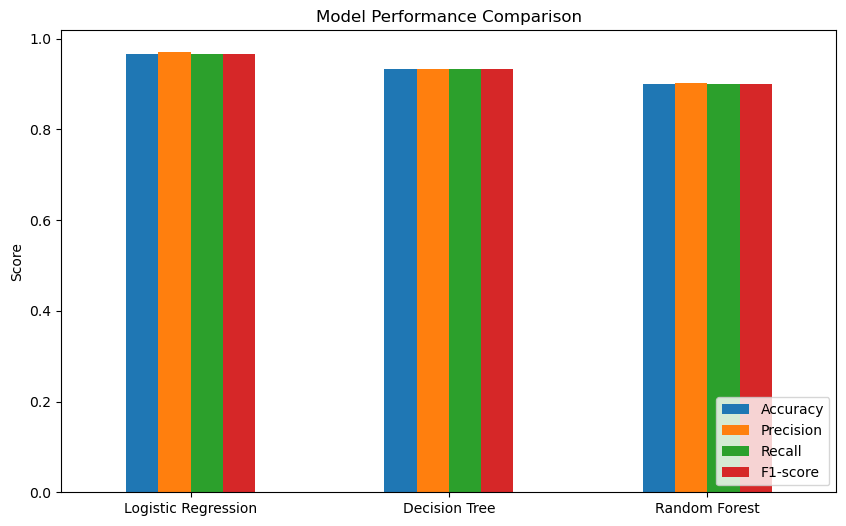

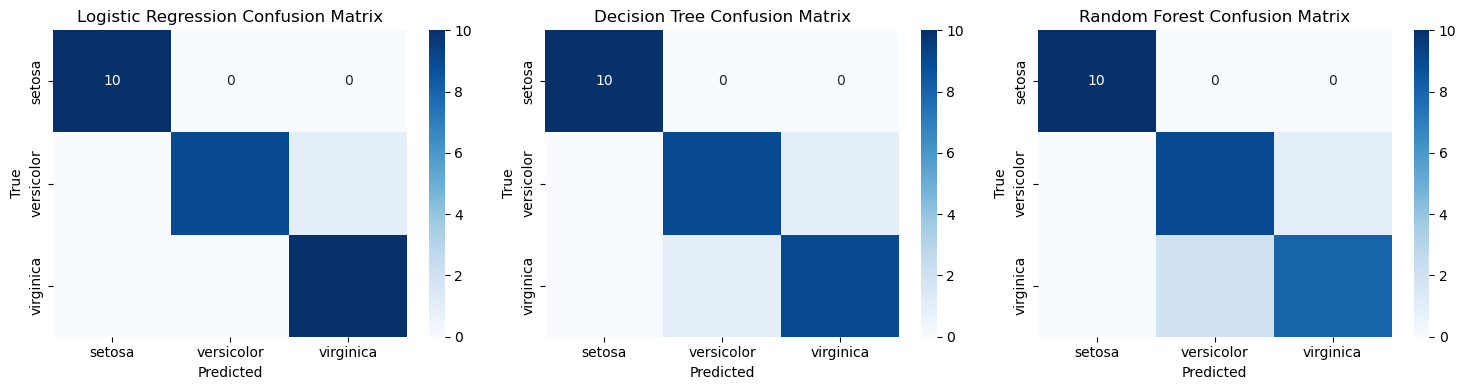


Classification Report (Random Forest):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# -----------------------------
# 1. Load Dataset
# -----------------------------
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 2. Train Models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1-score": f1_score(y_test, y_pred, average="macro"),
        "y_pred": y_pred
    }

# -----------------------------
# 3. Compare Metrics
# -----------------------------
metrics_df = pd.DataFrame(results).T.drop(columns="y_pred")
print(metrics_df)

# Bar chart for metrics
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# -----------------------------
# 4. Confusion Matrices
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = results[name]["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax,
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

# -----------------------------
# 5. Detailed Report for one model
# -----------------------------
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, results["Random Forest"]["y_pred"], target_names=iris.target_names))
